## Import library that we need to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv
import seaborn as sns

## Read the data and compile daily visitor data into a dataframe

In [14]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueDailyVisitors.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

data1 = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueAge.csv', index_col =0)
data2 = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueDistance.csv', index_col=0)
data3 = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueDuration.csv', index_col=0)
data4 = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueGender.csv', index_col=0)
data5 = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueSpend.csv', index_col=0)

## Compile the data into the a summary dataframe

In [15]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = data1.values
summary_data['Distance'] = data2.values
summary_data['Duration'] = data3.values
summary_data['Gender']= data4.values
summary_data['Spend'] = data5.values
summary_data['Total Visitors'] = data.sum().values

print(summary_data.head())

     Age  Distance  Duration  Gender  Spend  Total Visitors
XFP   33         6        87      50     22           25751
QJL   55        18       139      59     42           83101
WDZ   54         9       103      52     22           29430
BKI   47         4       116      57     18            9344
SPF   27        22       116      60     16          160917


## Sort the data by Total Visitors

The above code was intended to sort the Venue Daily Visitors dataframe by Total Visitors

In [4]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

## Figure 1. Total Visitors of each venues

The above visualisation was intended to explore Total Visitors of each venues

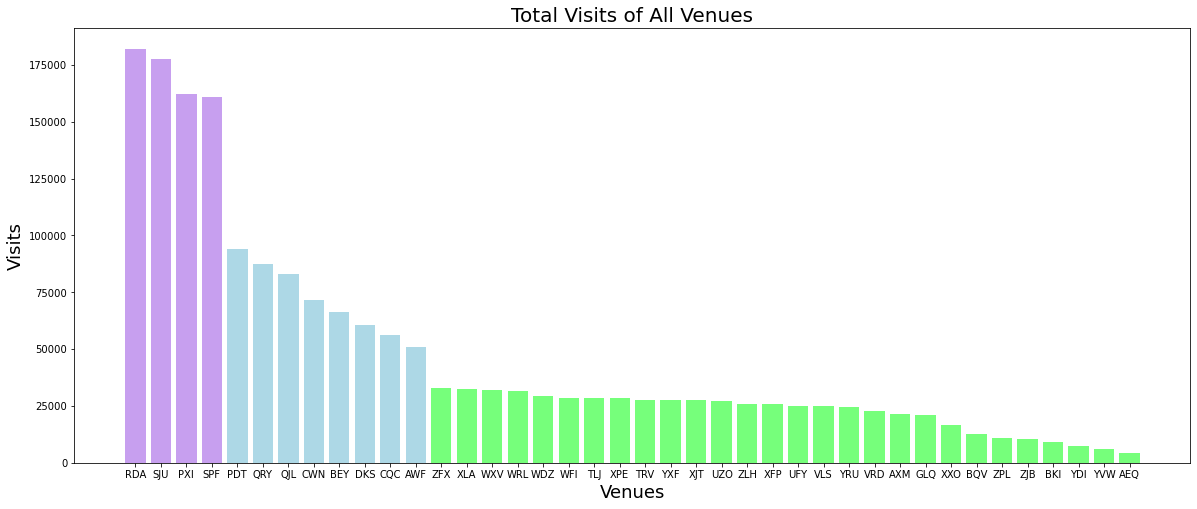

In [5]:
colours = []
for name in data.columns:
    Total_Visits = data[name].sum()
    if Total_Visits > 100000:
        colour = '#C79FEF'
    elif Total_Visits > 50000:
        colour = '#ADD8E6'
    else:
        colour = '#76FF7B'

    colours.append(colour)

plt.figure(figsize=(20, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center', color=colours)
plt.xticks(x_pos, data.columns)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Visits', fontsize=18)
plt.title('Total Visits of All Venues', fontsize=20)


plt.show()

## Create Dataframes for high , medium and low volume venues

The above code was Create Dataframes for high , medium and low volume venues

In [16]:
summary_data_high = summary_data.loc[data.sum() > 150000]
summary_data_medium = summary_data.loc[(data.sum() > 50000) & (data.sum() <=150000)]
summary_data_low = summary_data.loc[data.sum() <= 50000]


high_volume =  data.columns[data.sum() > 150000]
medium_volume = data.columns[(data.sum() > 50000) & (data.sum() <=150000)]
low_volume = data.columns[data.sum() <= 50000]

## Daily visitors for each venue over the year with monthly rolling average

The above Visualisation was intended to explore the daily visitors volume for each venue over the year with monthly rolling average


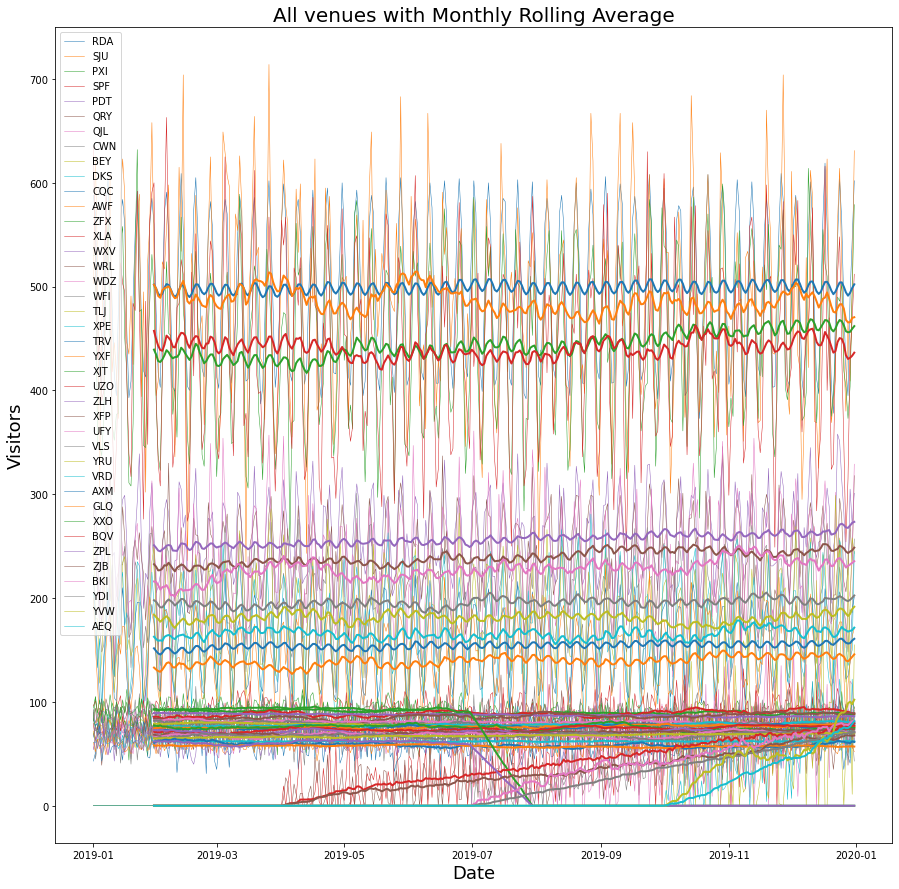

In [7]:
period = 30
rolling_average = data.rolling(window=period).mean()


plt.figure(figsize=(15, 15))
plt.plot(data, linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average, linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('All venues with Monthly Rolling Average', fontsize=20)
plt.legend(data, loc=2)
plt.show()


## Figure 2. Daily visitors for High volume venue over the year with monthly rolling average

The above Visualisation was intended to explore the daily visitors volume for High volume venue over the year with monthly rolling average

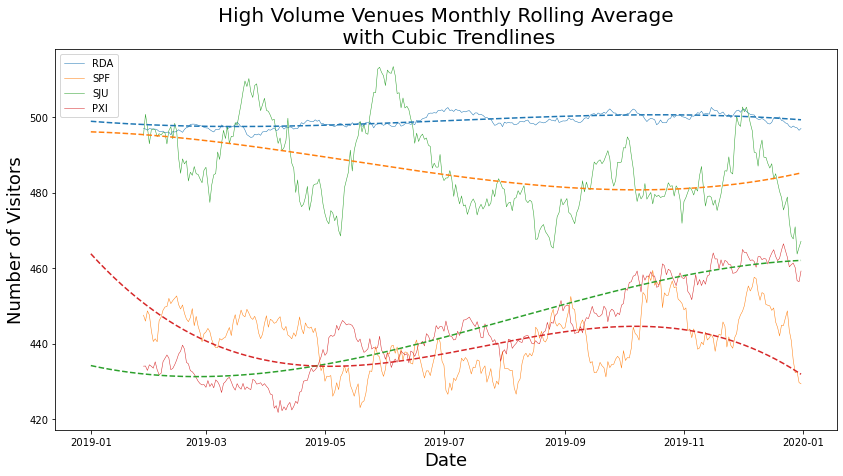

In [8]:
selected = ['RDA', 'SPF', 'SJU', 'PXI']


pd.plotting.register_matplotlib_converters()
sample_rate = 'M' # montly
averaged_data = data.resample(sample_rate).mean()
period = 28
rolling_average = data[high_volume].rolling(window=period).mean()


plt.figure(figsize=(14, 7))
plt.plot(rolling_average[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)


for name in high_volume:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 3) # create a polynomial curve to the trend
    trend = np.poly1d(z) # plot the trend against
    plt.plot(data[high_volume].index, trend(x), linestyle='--')



plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Visitors', fontsize=18)
plt.title('High Volume Venues Monthly Rolling Average\n with Cubic Trendlines', fontsize=20)
plt.legend(data[selected], loc=2)


plt.show()

## Figure 3. Daily visitors for anomalies venues over the year with monthly rolling average

The above Visualisation was intended to explore the daily visitors volume for anomalies venues over the year with monthly rolling average

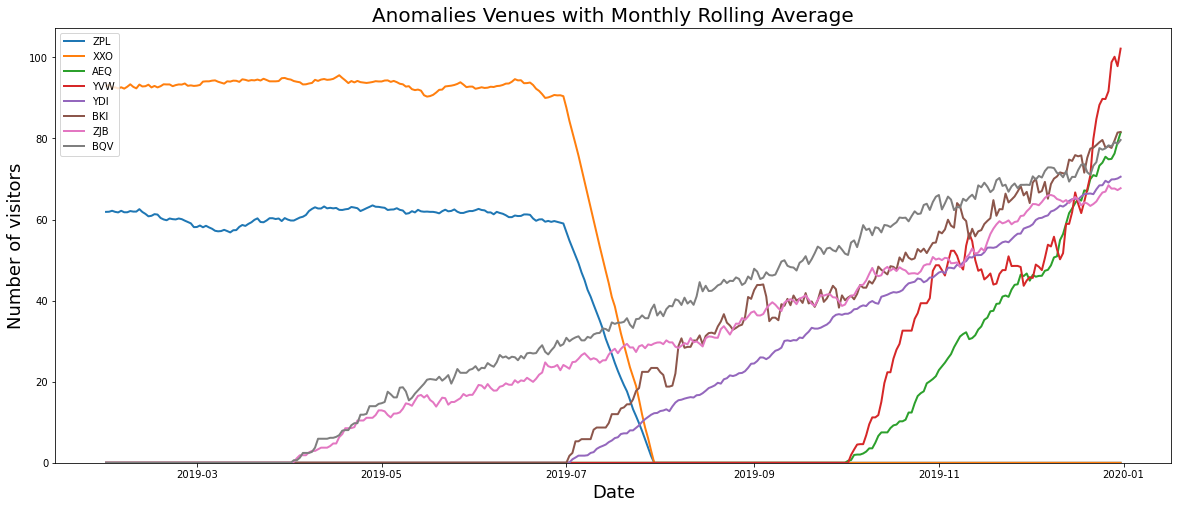

In [33]:
anomalies = ['ZPL','XXO','AEQ','YVW','YDI','BKI','ZJB','BQV']

period = 30
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(20, 8))
#plt.plot(data[anomalies], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[anomalies], linewidth=2)
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of visitors', fontsize=18)
plt.title('Anomalies Venues with Monthly Rolling Average', fontsize=20)
plt.legend(anomalies, loc=2)
plt.show()

## Figure 4. Correlation Heatmap for High volume venues

The above Visualisation was intended to explore the correlation between summary data in High volume venues

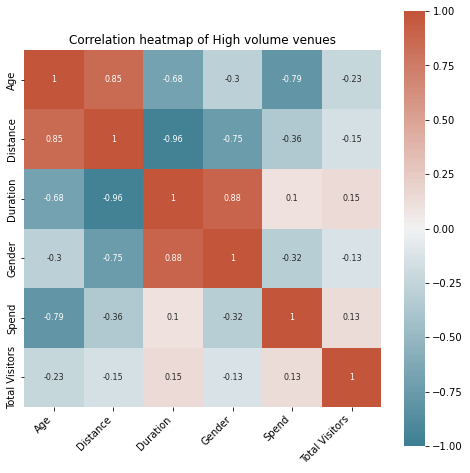

In [17]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001183418/VenueDailyVisitors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = data1.values
summary_data['Distance'] = data2.values
summary_data['Duration'] = data3.values
summary_data['Gender']= data4.values
summary_data['Spend'] = data5.values
summary_data['Total Visitors'] = data.sum().values


plt.figure(figsize=(8, 8))
corr = summary_data_high.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
ax.set_title('Correlation heatmap of High volume venues')
plt.show()


## Correlation Heatmap for Medium volume venues

The above Visualisation was intended to explore the correlation between summary data in Medium volume venues

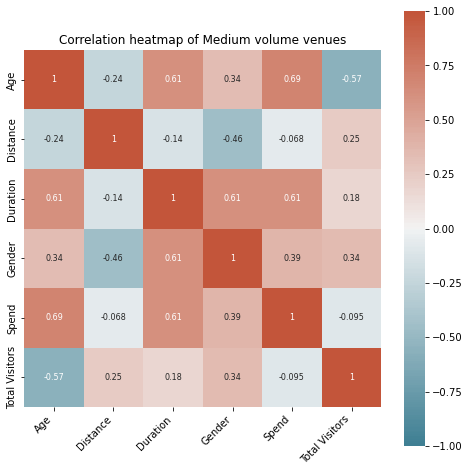

In [18]:
plt.figure(figsize=(8, 8))
corr = summary_data_medium.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
ax.set_title('Correlation heatmap of Medium volume venues')
plt.show()

## Correlation Heatmap for Low volume venues and all venues

The above Visualisations was intended to explore the correlation between summary data in Low volume venues and all venues

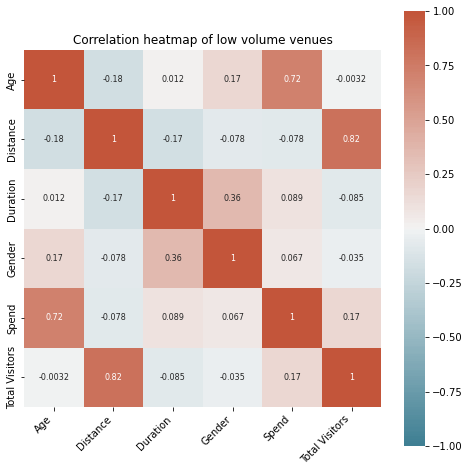

In [31]:
plt.figure(figsize=(8, 8))
corr = summary_data_low.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
ax.set_title('Correlation heatmap of low volume venues')
plt.show()

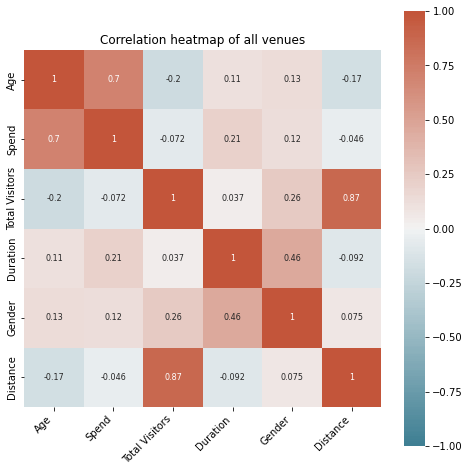

In [30]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
ax.set_title('Correlation heatmap of all venues')
plt.show()


## Figure 5. Seasonal behaviour of high volume and Medium volume venues

The above Visualisation was intended to explore the seasonal behaviour of high volume venues

This is an interactive graph. User can use the tools on the top right hand corner to have a better view of the data.

By using the 'Box zoom', user can know which date the visitor number has a peak.

And by enabling the 'Hover', user can know the number of visitor when they hover the cursor onto a point of the line.

In [21]:
high_medium = data.columns[data.sum() >50000]

plot = data[high_medium].hvplot.line(
    frame_height=300, frame_width=300,
    xlabel='Date', ylabel='Visitors',
    title='High & Medium Volume Venues',
    subplots=True
)
plot


:NdLayout   [Variable]
   :Curve   [Date]   (value)

## Figure 6. Relationship between Distance and Duration in high volume venues.

The above Visualisation was intended to explore the relationship between Distance and Duration in high volume venues.

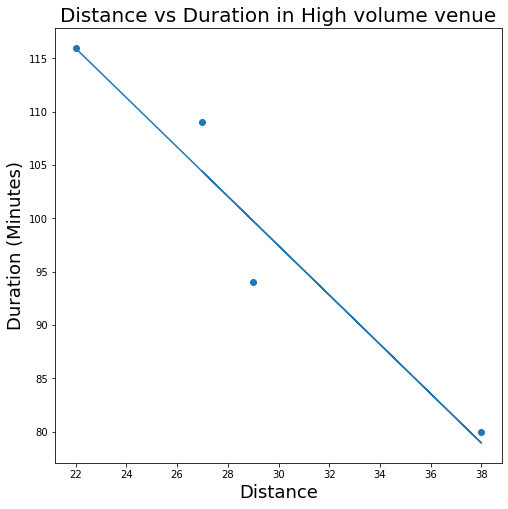

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_data_high['Distance'], summary_data_high['Duration'])
z = np.polyfit(summary_data_high['Distance'], summary_data_high['Duration'], 1)
trend = np.poly1d(z)
plt.plot(summary_data_high['Distance'], trend(summary_data_high['Distance']))
plt.title('Distance vs Duration in High volume venue', fontsize=20)
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Duration (Minutes)', fontsize=18)

plt.show()

## Figure 7. Relationship between Spend and Age and Duration in medium volume venues.

The above Visualisation was intended to explore the relationship between Spend and Age and Duration in medium volume venues.

This is an inter User can use the tools on the right hand side for a better view of the data.

By enabling 'Hover' tool, user can hover to the bubble on the graph and observe the value of each bubble such as Venue name, the size of the bubble and all the other value of the variables.

In [23]:
summary_data_medium['BubbleSize'] = summary_data_medium['Duration'] * 5


plot = summary_data_medium.hvplot.scatter(
    frame_height=500, frame_width=500,
    title=' Spend (£) vs Age (vs Duration) in Medium volume venue',
    xlabel='Spend (£)', ylabel='Age',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='Spend', y='Age', size='BubbleSize')
plot


:Scatter   [Spend]   (Age,BubbleSize,index,Distance,Duration,Gender,Total Visitors)

## Figure 8. Radar plot of attributes summary of low volume venues

The above code and Visualisation was intended to explore the attributes summary of low volume venues and restrucutre the summary data frame for better visualisation.

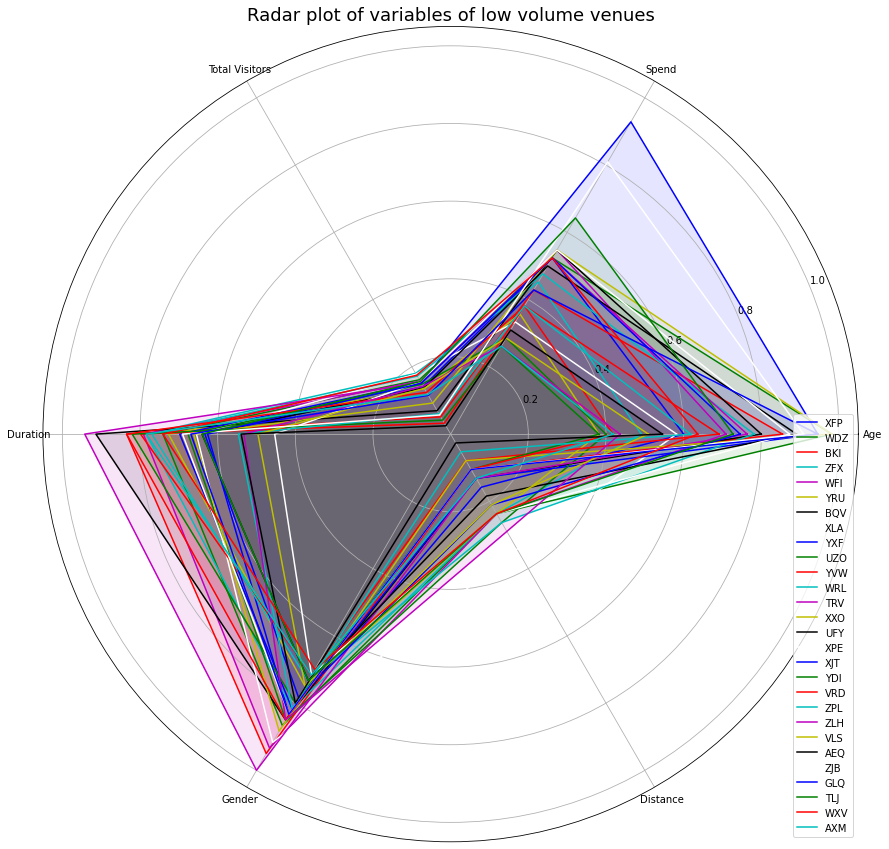

In [24]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = data1.values
summary_data['Spend'] = data5.values
summary_data['Total Visitors'] = data.sum().values
summary_data['Duration'] = data3.values
summary_data['Gender']= data4.values
summary_data['Distance'] = data2.values



normalised_data = summary_data / summary_data.max()


n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(15, 15))
sub = plt.subplot(1, 1, 1, polar=True)
for name in low_volume:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label=name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=4)
plt.title('Radar plot of variables of low volume venues', fontsize=18)
plt.show()